# Practical Machine Learning for Physicists
## Coursework C - Part 2


For both of these tasks we want you to implement autoencoder networks that:
- Train on randomly generated circles (using the circle_generator function below)
- Use 27x27 pixel images
- Use no more than 30,000 randomly generated samples (e.g. batchsize 30 and 1000 steps, or batchsize 1000 and 30 steps, or anywhere inbetween) in training the final networks for each task
- Use the mean_squared_error loss function
- Fulfil the network size requirement listed in the task (can be verifired using the print_layers function, after the network is partially trained)

### Task 1:
Implement any network design, but the bottleneck must contain no more than 9 neurons.

### Task 2:
Implement any network design, but the bottleneck must contain no more than 3 neurons.



#### Practicalities
You should use this notebook for your work and upload it to  Moodle. You are expected to use TensorFlow and Keras to complete these tasks. The notebook should be self-contained and able to be executed if necessary. Marks will be awarded for (roughly equally weighted):
- Overall notebook clarity (both in terms of good coding practice and coherent discussion)
- Task 1 performance (0.02 is a good target cost to do better than)
- Task 2 performance ( a good target here is left for the student to determine)



In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
#A big messy function to do the training
# model -- our keras neural model autoencoder
# image_generator -- a function to generate random images for the training (see below for examples)
# img_size -- the size of our image in pixels
# batchsize -- the number of images to include in each training batch
# steps -- the number of steps taken in the training
#
# returns an array of the costs
def generate_and_train(model,image_generator,img_size,batchsize,steps):
   
    #Generate an array of the numbers 1 to img_size and create a meshgrid from them    
    pixels=np.linspace(-1,1,img_size)
    x,y=np.meshgrid(pixels,pixels)
    
    #Now create a test image using 1 call to image_generator
    #y_test=np.zeros([1,pixels,pixels,1])
    #y_test[:,:,:,0]=image_generator(1,x,y)
    
    #Now create the empty arrays for the images and cost
    y_in=np.zeros([batchsize,img_size,img_size,1])
    y_target=np.zeros([batchsize,img_size,img_size,1])
    cost=np.zeros(steps)
    
    #Loop through the steps, get a random batch of samples, train the model, repeat
    for k in range(steps):
        # produce samples:
        y_in[:,:,:,0]=image_generator(batchsize,x,y)
        y_target=np.copy(y_in) # autoencoder wants to reproduce its input!
        
        # do one training step on this batch of samples:
        cost[k]=model.train_on_batch(y_in,y_target)
    
    return cost,y_target

def get_test_image(image_generator,img_size):
    #Generate an array of the numbers 1 to img_size and create a meshgrid from them    
    pixels=np.linspace(-1,1,img_size)
    x,y=np.meshgrid(pixels,pixels)
    
    #Now create a test image using 1 call to image_generator
    y_test=np.zeros([1,img_size,img_size,1])
    y_test[:,:,:,0]=image_generator(1,x,y)
    return y_test

# A function to generate and plot a single test image and the output of our model
# only to be called after training the model
def plot_test_image(model,image_generator,img_size):
    #Get random test image
    y_test=get_test_image(image_generator,img_size)
    
    #Create the output image
    y_test_out=model.predict_on_batch(y_test)
    fig, ax = plt.subplots(1,2)
    ax[0].imshow(y_test[0,:,:,0],origin='lower')
    ax[0].set_title("Input")
    ax[1].imshow(y_test_out[0,:,:,0],origin='lower')
    ax[1].set_title("Output")
    
def print_layers(network, y_in):
    """
    Call this on some test images y_in, to get a print-out of
    the layer sizes. Shapes shown are (batchsize,pixels,pixels,channels).
    After a call to the visualization routine, y_target will contain
    the last set of training images, so you could feed those in here.
    """
    layer_features=get_layer_activations(network,y_in)
    #print(layer_features)
    for idx,feature in enumerate(layer_features):
        s=np.shape(feature)
        print("Layer "+str(idx)+": "+str(s[1]*s[2]*s[3])+" neurons / ", s)

def get_layer_activation_extractor(network):
    #print(network.inputs)
    #for layer in network.layers:
    #    print(layer.output)
    return(keras.Model(inputs=network.inputs,
                            outputs=[layer.output for layer in network.layers]))

def get_layer_activations(network, y_in):
    """
    Call this on some test images y_in, to get the intermediate 
    layer neuron values. These are returned in a list, with one
    entry for each layer (the entries are arrays).
    """
    extractor=get_layer_activation_extractor(network)
    #print(extractor)
    layer_features = extractor(y_in)
    return layer_features
    

## Circle generator


In [3]:
# A simple image generator that returns an array of batchsize images
# each image has a size of x * y pixels
# in this image each image has a randomly placed circle (and the circle is of random size)
def circle_generator(batchsize,x,y):
    R=np.random.uniform(size=batchsize)
    x0=np.random.uniform(size=batchsize,low=-1,high=1)
    y0=np.random.uniform(size=batchsize,low=-1,high=1)
    return( 1.0*((x[None,:,:]-x0[:,None,None])**2 + (y[None,:,:]-y0[:,None,None])**2 < R[:,None,None]**2) )


In [4]:
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Times New Roman'
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

### Task 1: Autoenconder with bottleneck of 9 neurons

In [5]:
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(10, 7, input_shape = (None, None, 1), activation = 'relu', padding = 'same'))

model.add(keras.layers.AveragePooling2D(pool_size = (3, 3), padding = 'same'))

model.add(keras.layers.Conv2D(10, 7, activation = 'relu', padding = 'same'))

model.add(keras.layers.AveragePooling2D(pool_size = (3, 3), padding = 'same'))

# bottleneck with 9 neurons
model.add(keras.layers.Conv2D(1, 3, activation = 'relu', padding = 'same'))

model.add(keras.layers.UpSampling2D(size = (3, 3)))

model.add(keras.layers.Conv2D(10, 7, activation = 'relu', padding = 'same'))

model.add(keras.layers.UpSampling2D(size = (3, 3)))

model.add(keras.layers.Conv2D(10, 7, activation = 'relu', padding = 'same'))

model.add(keras.layers.Conv2D(9, 8, activation = 'linear', padding = 'same'))

model.compile(loss = 'mean_squared_error', optimizer = 'adam')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, None, None, 10)    500       
                                                                 
 average_pooling2d (Average  (None, None, None, 10)    0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, None, None, 10)    4910      
                                                                 
 average_pooling2d_1 (Avera  (None, None, None, 10)    0         
 gePooling2D)                                                    
                                                                 
 conv2d_2 (Conv2D)           (None, None, None, 1)     91        
                                                                 
 up_sampling2d (UpSampling2  (None, None, None, 1)     0

In [6]:
%%time

steps = 1000

cost, y_target = generate_and_train(model, circle_generator, img_size = 27, batchsize = 30, steps = steps)

CPU times: user 2min 8s, sys: 17.4 s, total: 2min 26s
Wall time: 30.3 s


<IPython.core.display.Javascript object>


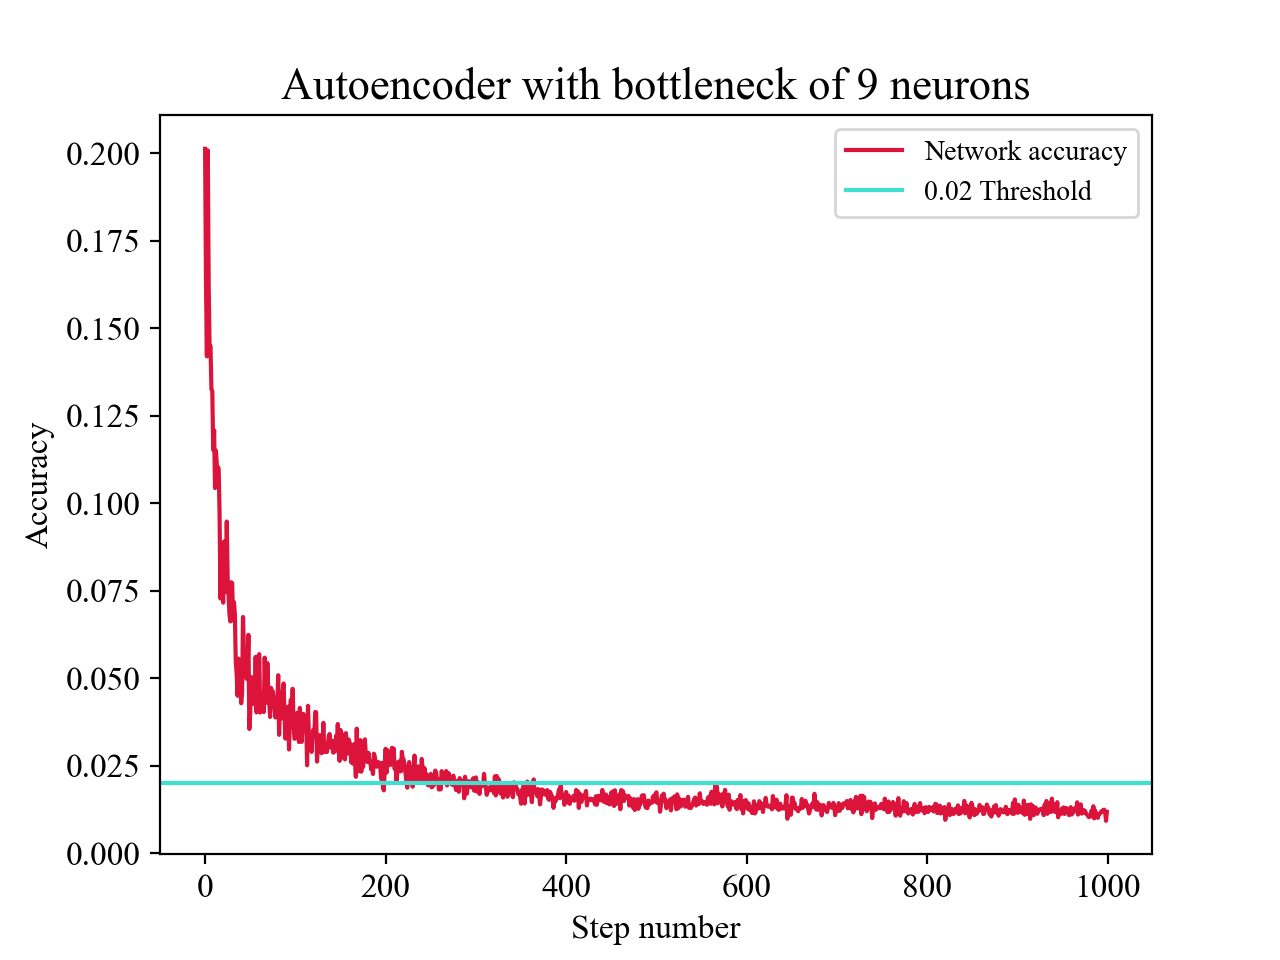

0.011795226484537125


In [7]:
plt.figure(1)

plt.plot(np.arange(steps), cost, color='crimson', label =  'Network accuracy')
plt.axhline(y=0.02, xmin=0, xmax=1, color='turquoise', label = '0.02 Threshold')
plt.xlabel('Step number')
plt.ylabel('Accuracy')
plt.title('Autoencoder with bottleneck of 9 neurons')
plt.legend(loc='best')

print(cost[-1])

<IPython.core.display.Javascript object>


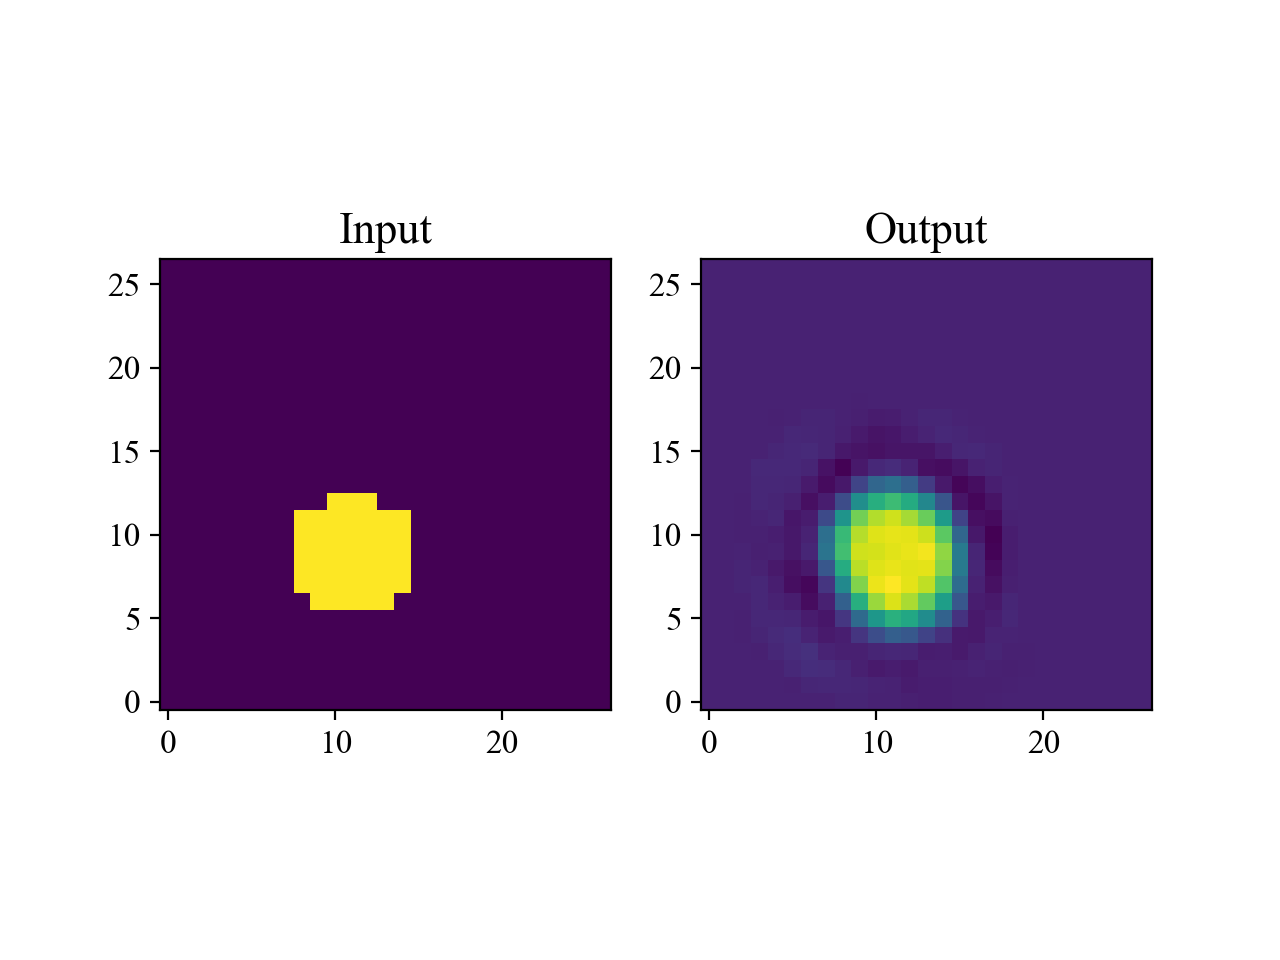

In [8]:
plot_test_image(model,circle_generator, 27)

In [9]:
print_layers(model, y_target)

Layer 0: 7290 neurons /  (30, 27, 27, 10)
Layer 1: 810 neurons /  (30, 9, 9, 10)
Layer 2: 810 neurons /  (30, 9, 9, 10)
Layer 3: 90 neurons /  (30, 3, 3, 10)
Layer 4: 9 neurons /  (30, 3, 3, 1)
Layer 5: 81 neurons /  (30, 9, 9, 1)
Layer 6: 810 neurons /  (30, 9, 9, 10)
Layer 7: 7290 neurons /  (30, 27, 27, 10)
Layer 8: 7290 neurons /  (30, 27, 27, 10)
Layer 9: 6561 neurons /  (30, 27, 27, 9)


With a bottleneck of 9 neurons, the autoencoder managed to achieve a final performance value of 0.011, below 0.02 which indicates a very good network performance. The Autoencoder is able to compress the circle image to 9 neurons and then reproduce the image again to high accuracy, indicated in figure 2. It is layer 4 which is the bottleneck, from above it has 9 neurons.

### Task 2: Autoencoder with bottleneck of 3 neurons 

In [10]:
model2 = keras.models.Sequential()

model2.add(keras.layers.Conv2D(30,10,input_shape=(None,None,1),
               activation="relu",padding='same'))

model2.add(keras.layers.AveragePooling2D(pool_size=(3,3),padding='same'))

model2.add(keras.layers.Conv2D(10,10,
               activation="relu",padding='same'))

model2.add(keras.layers.AveragePooling2D(pool_size=(3,3),padding='same')) 

model2.add(keras.layers.Conv2D(10,10,input_shape=(None,None,1),
               activation="relu",padding='same'))

model2.add(keras.layers.AveragePooling2D(pool_size=(3,3),padding='same')) 

# bottleneck with 3 neurons
model2.add(keras.layers.Conv2D(3,3,
               activation="relu",padding='same'))

model2.add(keras.layers.UpSampling2D(size=(3,3))) 

model2.add(keras.layers.Conv2D(10,10,
             activation="relu",padding='same'))

model2.add(keras.layers.UpSampling2D(size=(3,3))) 

model2.add(keras.layers.Conv2D(30,10,
               activation="relu",padding='same'))

model2.add(keras.layers.UpSampling2D(size=(3,3))) 

model2.add(keras.layers.Conv2D(10,10,
               activation="sigmoid",padding='same'))

model2.compile(loss='mean_squared_error',
              optimizer='adam')

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, None, None, 30)    3030      
                                                                 
 average_pooling2d_2 (Avera  (None, None, None, 30)    0         
 gePooling2D)                                                    
                                                                 
 conv2d_7 (Conv2D)           (None, None, None, 10)    30010     
                                                                 
 average_pooling2d_3 (Avera  (None, None, None, 10)    0         
 gePooling2D)                                                    
                                                                 
 conv2d_8 (Conv2D)           (None, None, None, 10)    10010     
                                                                 
 average_pooling2d_4 (Avera  (None, None, None, 10)   

In [11]:
%%time

cost2, y_target2 = generate_and_train(model2, circle_generator, img_size = 27, batchsize = 30, steps = steps)

CPU times: user 5min 8s, sys: 29.4 s, total: 5min 37s
Wall time: 1min 9s


<IPython.core.display.Javascript object>


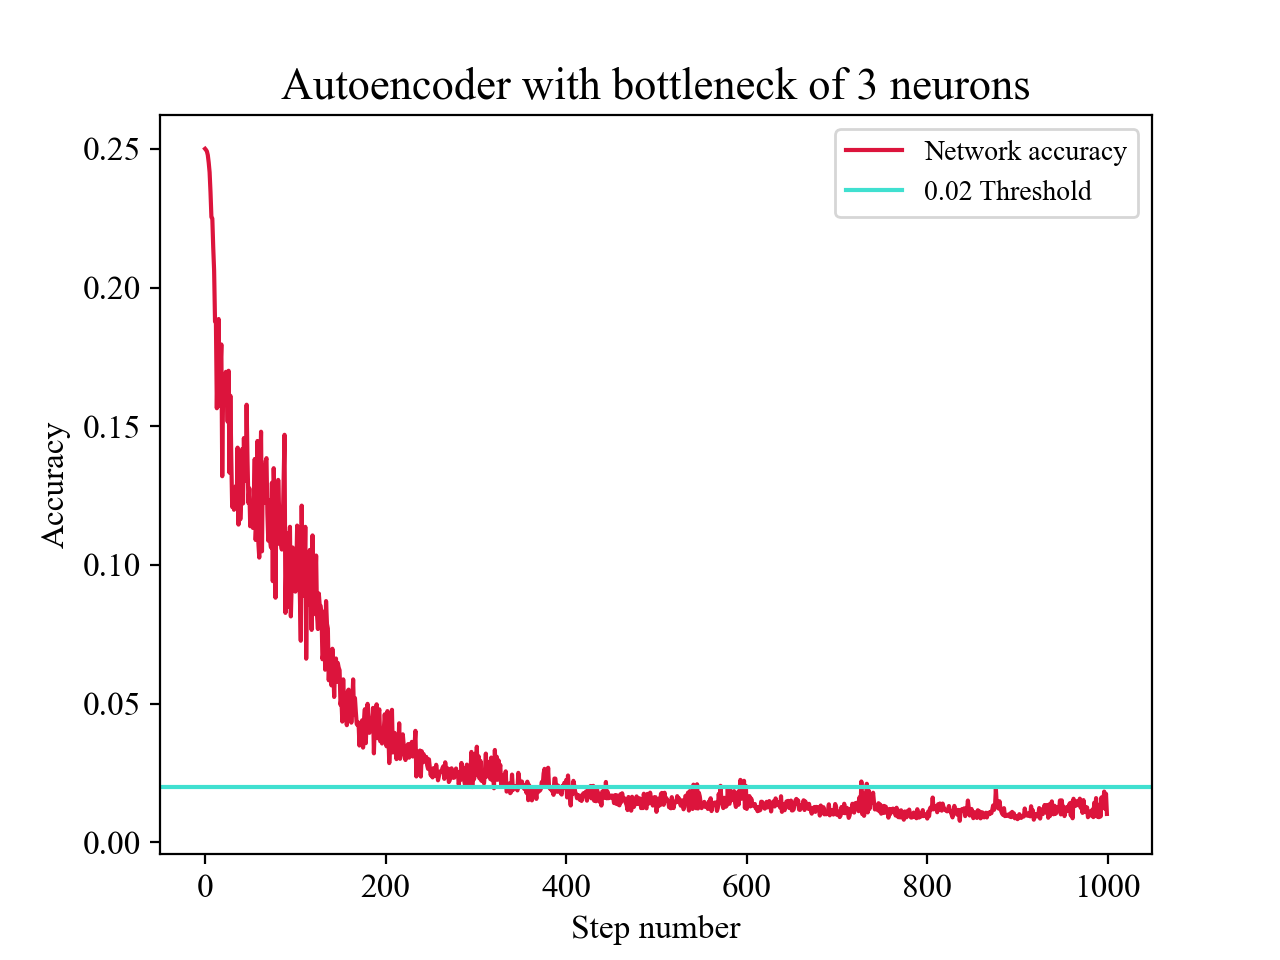

0.010239574126899242


In [12]:
plt.figure(3)

plt.plot(np.arange(steps), cost2, color='crimson', label =  'Network accuracy')
plt.axhline(y=0.02, xmin=0, xmax=1, color='turquoise', label = '0.02 Threshold')

plt.xlabel('Step number')
plt.ylabel('Accuracy')
plt.title('Autoencoder with bottleneck of 3 neurons')
plt.legend(loc='best')

print(cost2[-1])

<IPython.core.display.Javascript object>


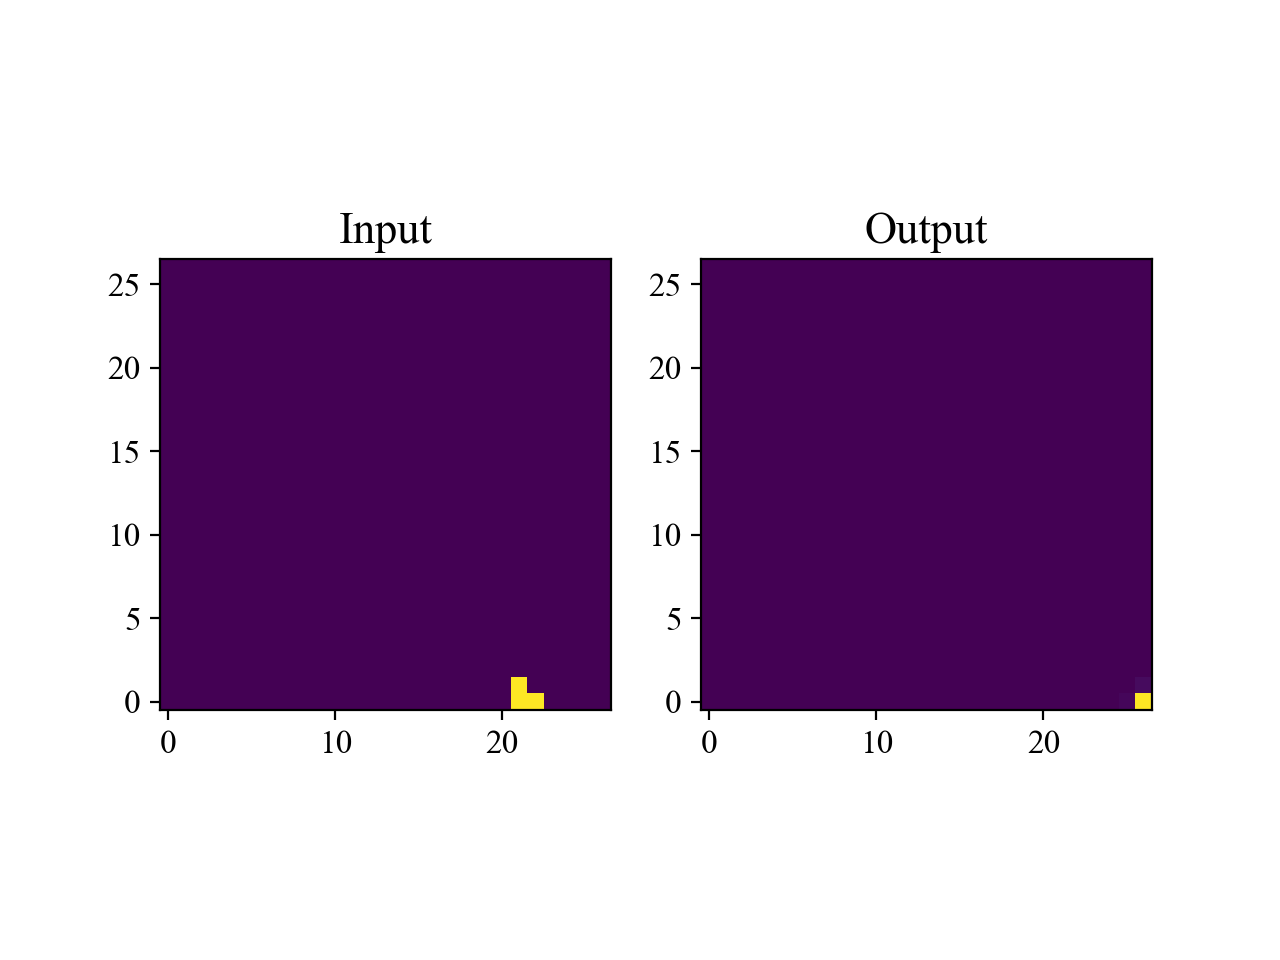

In [13]:
plot_test_image(model2,circle_generator, 27)

In [14]:
print_layers(model2, y_target)

Layer 0: 21870 neurons /  (30, 27, 27, 30)
Layer 1: 2430 neurons /  (30, 9, 9, 30)
Layer 2: 810 neurons /  (30, 9, 9, 10)
Layer 3: 90 neurons /  (30, 3, 3, 10)
Layer 4: 90 neurons /  (30, 3, 3, 10)
Layer 5: 10 neurons /  (30, 1, 1, 10)
Layer 6: 3 neurons /  (30, 1, 1, 3)
Layer 7: 27 neurons /  (30, 3, 3, 3)
Layer 8: 90 neurons /  (30, 3, 3, 10)
Layer 9: 810 neurons /  (30, 9, 9, 10)
Layer 10: 2430 neurons /  (30, 9, 9, 30)
Layer 11: 21870 neurons /  (30, 27, 27, 30)
Layer 12: 7290 neurons /  (30, 27, 27, 10)


With a bottleneck of 3 neurons, the autoencoder managed to achieve a final performance value of 0.012, also below the 0.02 threshold.

### Conclusion

In both models I used 30 batches of batchsize 1000 to get to the 30000 sample requirement. Both autoencoders are able to achieve costs less than the target of 0.02, indicating they are good autoencoders and are able to compress and reproduce the images fed into them accurately. The first autoencoder, which contains 9 neurons in the bottleneck, achived a lower final cost than the first autoencoder which has 3 neurons in its bottleneck.